In [2]:
import pandas as pd

In [8]:
# Load the dataset (update the file path if needed)
df = pd.read_csv("kc_house_data.csv")

In [9]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot and submit it. 

In [12]:
df.drop(["id"], axis=1, inplace=True)
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
floors_count = df['floors'].value_counts().to_frame()

# Rename the column for clarity
floors_count.rename(columns={'floors': 'count'}, inplace=True)

# Display the result
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


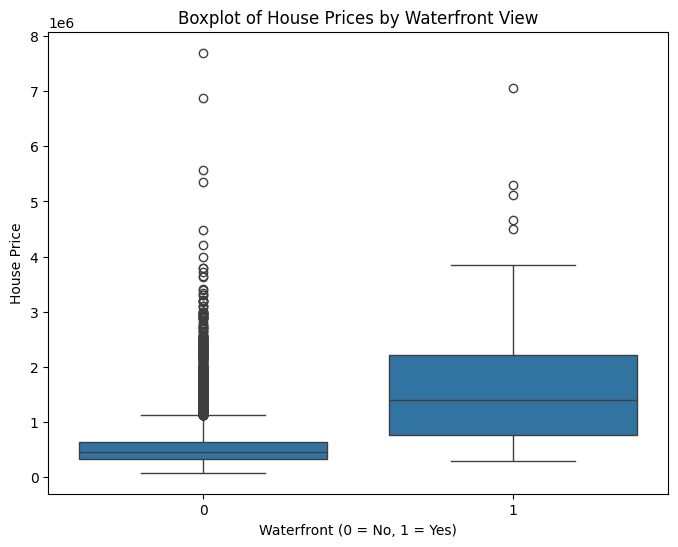

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for price vs waterfront
plt.figure(figsize=(8,6))
sns.boxplot(x="waterfront", y="price", data=df)

# Add labels and title
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("House Price")
plt.title("Boxplot of House Prices by Waterfront View")

plt.show()


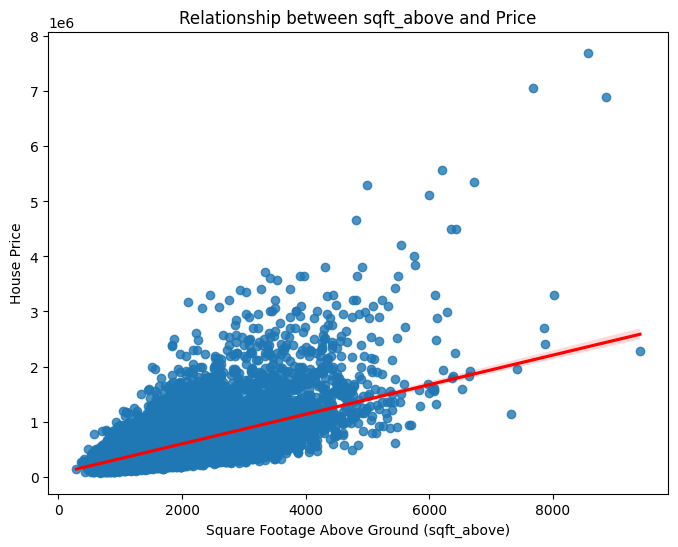

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create regression plot for sqft_above vs price
plt.figure(figsize=(8,6))
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"red"})

# Add labels and title
plt.xlabel("Square Footage Above Ground (sqft_above)")
plt.ylabel("House Price")
plt.title("Relationship between sqft_above and Price")

plt.show()


In [16]:
from sklearn.linear_model import LinearRegression

# Define feature and target
X = df[['sqft_living']]   # Independent variable
y = df['price']           # Dependent variable

# Create linear regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)

print("R^2 value:", r2)


R^2 value: 0.4928532179037931


In [17]:
from sklearn.linear_model import LinearRegression

# Define feature list
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

# Create model
lm = LinearRegression()

# Fit model
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)
print("R^2 for Multiple Linear Regression:", r2)


R^2 for Multiple Linear Regression: 0.6577151058279326


In [18]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create pipeline
pipe = Pipeline([
    ('scale', StandardScaler()), 
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Fit pipeline
pipe.fit(X, y)

# Calculate R^2
r2_pipe = pipe.score(X, y)
print("R^2 for Pipeline with Polynomial Regression:", r2_pipe)


R^2 for Pipeline with Polynomial Regression: 0.7513467656307783


In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Ridge regression with alpha=0.1
ridge = Ridge(alpha=0.1)

# Fit model
ridge.fit(X_train, y_train)

# Calculate R^2 on test data
r2_ridge = ridge.score(X_test, y_test)
print("R^2 for Ridge Regression:", r2_ridge)


R^2 for Ridge Regression: 0.6460194468601674


In [20]:
# Polynomial transform of degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression with alpha=0.1
ridge_poly = Ridge(alpha=0.1)

# Fit model
ridge_poly.fit(X_train_poly, y_train)

# Calculate R^2 on test data
r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print("R^2 for Ridge Regression with Polynomial Features:", r2_ridge_poly)


R^2 for Ridge Regression with Polynomial Features: 0.7546208821086667
